# Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/praktikum-ml/mushrooms.csv"

Mounted at /content/drive


# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold

# EDA

In [ ]:
df=pd.read_csv(path)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


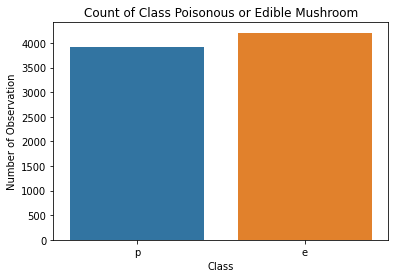

In [ ]:
sns.countplot('class',data=df)
plt.title('Count of Class Poisonous or Edible Mushroom')
plt.xlabel('Class')
plt.ylabel('Number of Observation')
plt.show()

In [ ]:
df["class"].value_counts() 

e    4208
p    3916
Name: class, dtype: int64

<Figure size 720x360 with 0 Axes>

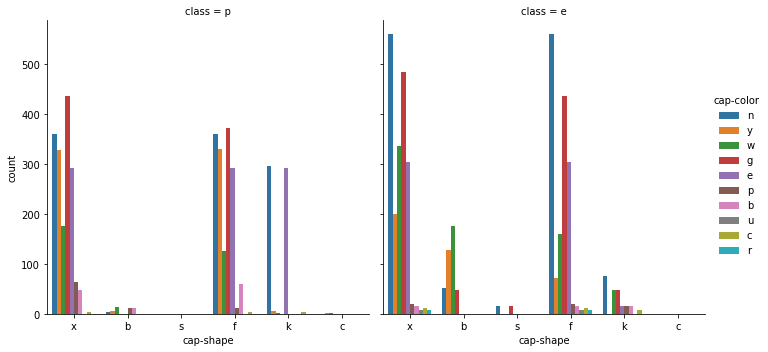

In [ ]:
plt.figure(figsize = (10,5))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                height=5)

# Null Data

In [ ]:
null_data=df.isna().sum()
null_data

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Unique Data

In [ ]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

# Describe Data

In [ ]:
vectorizer=CountVectorizer(lowercase=False)
vectorizer.fit_transform(df)
feat_dict=vectorizer.vocabulary_.keys()
feat_dict

dict_keys(['class', 'cap', 'shape', 'surface', 'color', 'bruises', 'odor', 'gill', 'attachment', 'spacing', 'size', 'stalk', 'root', 'above', 'ring', 'below', 'veil', 'type', 'number', 'spore', 'print', 'population', 'habitat'])

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Label Encoder

In [ ]:
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Feature Selection

In [ ]:
X = df.drop(columns='class')
y = df['class']

In [ ]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.fit(X_train,y_train)
print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [ ]:
rf2 = RandomForestClassifier(bootstrap=True)
rf2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf2.fit(X_train,y_train)
print('Training set score: {:.4f}'.format(rf2.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf2.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


## Hyperparameter Tuning

In [ ]:
params = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

In [ ]:
clf=GridSearchCV(RandomForestClassifier(random_state = 42),param_grid=params,cv=StratifiedKFold(n_splits = 5),scoring="accuracy")
clf.fit(X_train,y_train)
best_params = clf.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## New Model After Hyperparameter Tuning

In [ ]:
y_pred = clf.fit(X_train,y_train)
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


# Decision Tree

In [ ]:
dt_params = {"min_samples_split" : range(20,400,20),
                "max_depth": range(2,18,2)}

In [ ]:
clf_dt=GridSearchCV(DecisionTreeClassifier(random_state = 42),param_grid=dt_params,cv=StratifiedKFold(n_splits = 5),scoring="accuracy")

In [ ]:
y_pred = clf_dt.fit(X_train,y_train)
print('Training set score: {:.4f}'.format(clf_dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_dt.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


# Confusion Matrix

In [ ]:
conf_matrix= []
conf_matrix.append(confusion_matrix(y_test, clf_dt.predict(X_test)))
conf_matrix.append(confusion_matrix(y_test, clf.predict(X_test)))

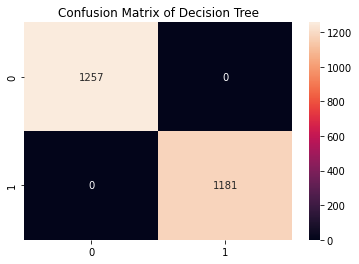

In [ ]:
plt.subplots()
plt.title("Confusion Matrix of Decision Tree")
sns.heatmap(conf_matrix[0],annot=True,fmt='d')

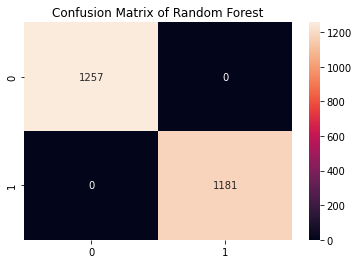

In [ ]:
plt.subplots()
plt.title("Confusion Matrix of Random Forest")
sns.heatmap(conf_matrix[1],annot=True,fmt='d')

# Accuracy Score

In [ ]:
Cross_Val_Test_Scores=[]
Cross_Val_Test_Scores.append(cross_val_score(clf_dt, X_test, y_test,scoring="accuracy", cv=5).mean())
Cross_Val_Test_Scores.append(cross_val_score(clf, X_test, y_test,scoring="accuracy", cv=5).mean())
Cross_Val_Test_Scores.append(cross_val_score(rf, X_test, y_test,scoring="accuracy", cv=5).mean())
Cross_Val_Test_Scores.append(cross_val_score(rf2, X_test, y_test,scoring="accuracy", cv=5).mean())

In [ ]:
print("Cross Validation Test Score")
print("Decision Tree: ", Cross_Val_Test_Scores[0])
print("Random Forest 1: ", Cross_Val_Test_Scores[1])
print("Random Forest 2: ", Cross_Val_Test_Scores[2])
print("Random Forest 3: ", Cross_Val_Test_Scores[3])

Cross Validation Test Score
Decision Tree:  0.9946679233850608
Random Forest 1:  0.9995901639344262
Random Forest 2:  0.9995901639344262
Random Forest 2:  0.9995901639344262


# Kesimpulan

1. Data tidak imbalance
2. Data dengan class edible > class poisonous
3. Data berupa kategorikal di sini saya ubah dengan label encoder
4. Akurasi dengan random forest sedikit lebih baik dibandingkan dengan akurasi decision tree
5. Di sini saya menggunakan K-Fold Cross Validation
6. Untuk mencari best parameters saya menggunakan Grid Search